In [1]:
import math
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

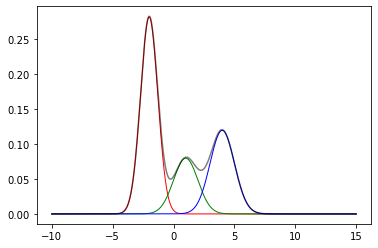

In [2]:
#Original set
Ao= stats.norm(-2, np.sqrt(0.5)) 
Bo = stats.norm(1, np.sqrt(1))
Co = stats.norm(4, np.sqrt(1))

#display function
def display(Ao,Bo,Co,w1,w2,w3):
    x = np.arange(-10, 15, 0.0001)
    ya = w1*Ao.pdf(x)
    yb = w2*Bo.pdf(x)
    yc = w3*Co.pdf(x)

    yd= w1*Ao.pdf(x) + w2*Bo.pdf(x)+w3*Co.pdf(x)

    plt.plot(x, ya, color='red', linewidth=1)
    plt.plot(x, yb, color='green',  linewidth=1)
    plt.plot(x, yc, color='blue', linewidth=1)
    plt.plot(x, yd, color='black', linestyle='-', alpha=0.5)


    plt.show()
    
display(Ao,Bo,Co,0.5,0.2,0.3)

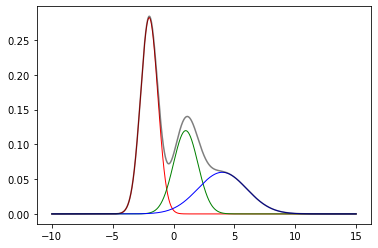

In [3]:
data =[-3, -2.5, -1, 0,2,4,5]

##Mixture models initialization
A= stats.norm(-2, np.sqrt(0.5)) 
B = stats.norm(1, np.sqrt(1))
C = stats.norm(4, np.sqrt(4))

##Weights initialization
w1,w2,w3= 0.5, 0.3 , 0.3

display(A,B,C,w1,w2,w3)

In [4]:
#Calculate responsibilities
def responsibilities(x, A,B,C, w1, w2, w3):
    asum = w1*A.pdf(x)
    bsum = w2*B.pdf(x)
    csum = w3*C.pdf(x)

    dsum = asum + bsum + csum
    
    return [round(asum/dsum,5), round(bsum/dsum,5), round(csum/dsum,5)]
    

allresponsibilities = np.array([responsibilities(dx, A,B,C, w1, w2, w3) for dx in data]).reshape((len(data),3))
print(allresponsibilities)

[[9.9835e-01 3.9000e-04 1.2600e-03]
 [9.9743e-01 1.1900e-03 1.3800e-03]
 [8.4644e-01 1.3211e-01 2.1450e-02]
 [6.0180e-02 8.4549e-01 9.4330e-02]
 [0.0000e+00 6.6667e-01 3.3333e-01]
 [0.0000e+00 2.1740e-02 9.7826e-01]
 [0.0000e+00 7.6000e-04 9.9924e-01]]


In [5]:
#Update mixture means
def updatemean(k, allresponsibilities, data):
    r_k = allresponsibilities[:,k]  #responsibilities of kth component
    numerator = np.sum([r_k for x in range(len(data))])
    denominator = np.sum(r_k)
    return numerator/denominator
    
means= [updatemean(k, allresponsibilities, data) for k in range(0,3)]

print(means)

[7.0, 6.999999999999999, 7.0]


In [8]:
#Update mixture sigmasquares
def updatesigmasq(k, allresponsibilities, data, means):
    r_k = allresponsibilities[:,k]   #responsibilities of kth component
    numerator = np.sum([r_k*(x-means[k])**2 for x in range(len(data))])
    denominator = np.sum(r_k)
    return numerator/denominator
    
sigmasqs = [updatesigmasq(k , allresponsibilities, data, means) for k in range(0,3)]

print(sigmasqs)


[140.00000000000003, 139.99999999999991, 140.0]


In [9]:
#Update mixture weights
def updateweights(k, allresponsibilities):
    numerator = np.sum(allresponsibilities[:,k])
    denominator = np.sum(allresponsibilities)
    return numerator/denominator
 
weights = [updateweights(k , allresponsibilities) for k in range(0,3)]

print(weights)

[0.4146285714285714, 0.2383357142857143, 0.3470357142857143]


In [10]:
#Negative Log Likelihood
def checkconverge(weights, means, sigmasqs, data):
    cumsum = 0
    for d in data:
        temp = 0
        for k in range(3):
            temp+= weights[k]*stats.norm(means[k], np.sqrt(sigmasqs[k])).pdf(d)
        cumsum = cumsum+ np.log(temp)*-1
    return cumsum

checkconverge(weights, means, sigmasqs, data)

checkconverge([w1,w2,w3],[-4,0,8],[1,0.2,3],data)

28.00396145451752